#### Importando bibliotecas

In [2]:
from router_metrics import RouterMetrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Definindo os roteadores e instanciando classes!

In [3]:
# Carrega as métricas
metricas = pd.read_excel('Métricas dos pacotes.xlsx')

# Instancia o objeto da rede
rede = RouterMetrics(metricas)

## Tabela de Roteamento

### OSPF

In [4]:
rede.show_routing_table('router0')

📡 Tabela de roteamento de router0:
Codes: K - kernel route, C - connected, S - static, R - RIP,
       O - OSPF, I - IS-IS, B - BGP, E - EIGRP, N - NHRP,
       T - Table, v - VNC, V - VNC-Direct, A - Babel, F - PBR,
       f - OpenFabric,
       > - selected route, * - FIB route, q - queued, r - rejected, b - backup
       t - trapped, o - offload failure

K>* 0.0.0.0/0 [0/0] via 192.168.0.254, eth0, 04:31:24
O   192.168.0.0/24 [110/10] is directly connected, eth0, weight 1, 04:30:43
C>* 192.168.0.0/24 is directly connected, eth0, 04:31:24
O>* 192.168.1.0/24 [110/20] via 192.168.0.1, eth0, weight 1, 04:30:39
O>* 192.168.2.0/24 [110/20] via 192.168.0.1, eth0, weight 1, 04:30:39



### RIP

In [5]:
rede.show_routing_table('router6')

📡 Tabela de roteamento de router6:
Codes: K - kernel route, C - connected, S - static, R - RIP,
       O - OSPF, I - IS-IS, B - BGP, E - EIGRP, N - NHRP,
       T - Table, v - VNC, V - VNC-Direct, A - Babel, F - PBR,
       f - OpenFabric,
       > - selected route, * - FIB route, q - queued, r - rejected, b - backup
       t - trapped, o - offload failure

K>* 0.0.0.0/0 [0/0] via 192.168.6.254, eth0, 04:31:25
R>* 192.168.5.0/24 [120/2] via 192.168.6.1, eth0, weight 1, 04:31:22
C>* 192.168.6.0/24 is directly connected, eth0, 04:31:25
R>* 192.168.7.0/24 [120/2] via 192.168.6.1, eth0, weight 1, 04:31:22



### Quantidade de pacotes de roteamento enviados na rede

Média dos pacotes enviados por protocolo em cada execução

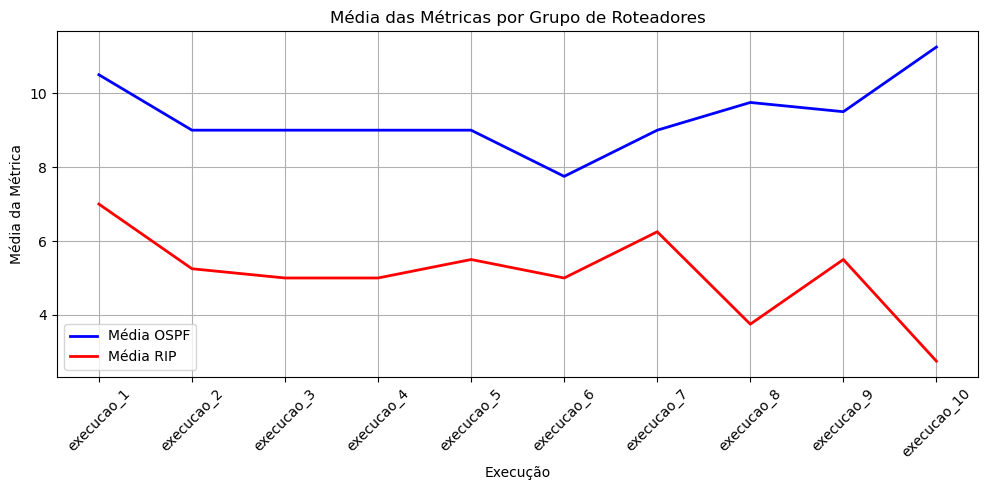

In [6]:
rede.plot_medias_por_grupo()

Volume total de pacotes na rede por protocolo

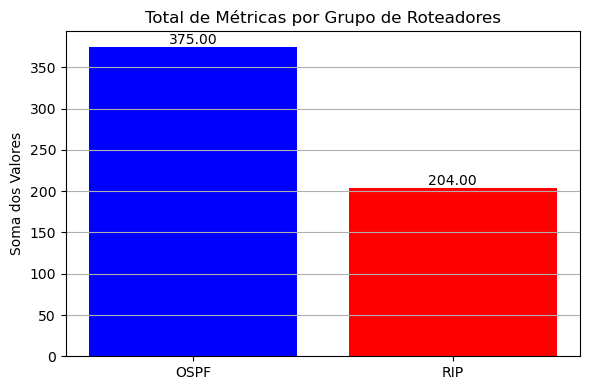

📦 Volume total de pacotes do protocolo OSPF = 375

📦 Volume total de pacotes do protocolo RIP = 204



In [7]:
rede.plot_soma_total_por_grupo()

O protocolo OSPF teve um volume de pacotes 83.82% maior do que o protocolo RIP

Comparação de tipos de pacotes enviados para OSPF e RIP

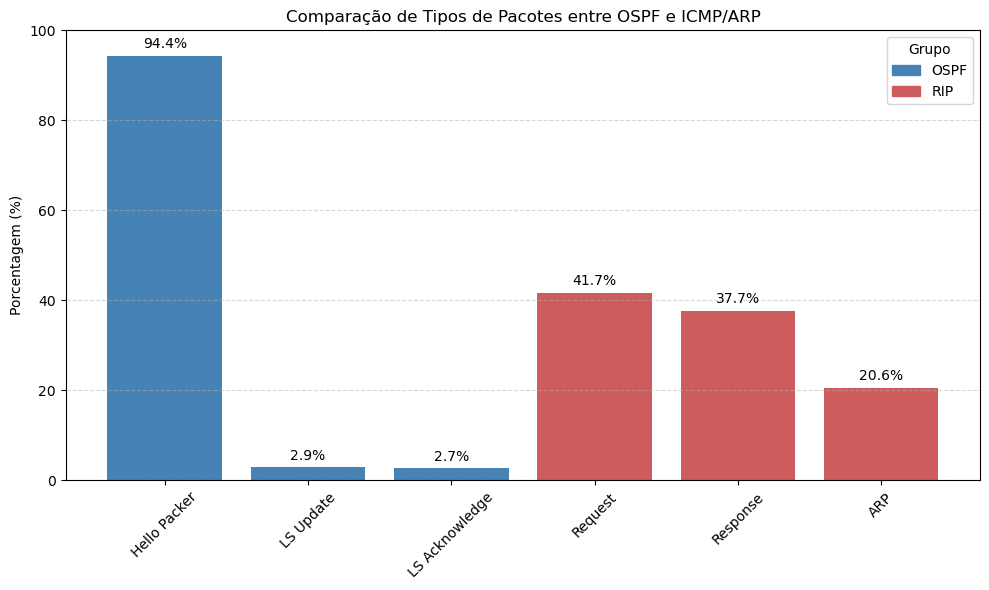

In [8]:
rede.plot_porcentagem_tipos_pacotes()

<h2>📈 Cálculo da Taxa de Transmissão</h2>
<p>
  A taxa de transmissão é calculada com base no tamanho do arquivo <code>.pcap</code> gerado pela captura, dividido pela duração da captura:
</p>

<img src="taxa_transmissao.png" alt="Fórmula da Taxa" width="400"/>

<p><b>Onde:</b><br>
<b>Tamanho do arquivo (bytes)</b>: obtido com <code>os.path.getsize()</code><br>
<b>Duração da captura (s)</b>: tempo definido no <code>tshark</code> (ex: 60 segundos)
</p>

<p>
📊 Com base nas capturas realizadas:
<ul>
  <li>A taxa de transmissão do protocolo <b>OSPF</b> foi aproximadamente <b>2472 bytes/s</b>.</li>
  <li>A taxa de transmissão do protocolo <b>RIP</b> foi aproximadamente <b>1068 bytes/s</b>.</li>
</ul>
</p>
